<a href="https://colab.research.google.com/github/Divyakalgaiya/Patient_clustering/blob/main/Patient_clustering_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project title: Patient Clustering
# Domain: Healthcare
# Clustering method: K-means
# Submitted by: Divya

# Step 1: : Problem Understanding
Objective: To segment patients based on symptoms to identify groups with similar health profiles.

# Step 2: Data collection and data preparation

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# DATA COLLECTION
df=pd.read_csv('/content/patient_dataset.csv')

In [ ]:
# First five rows
display(df)

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1.0,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,Rural,Non-Smoker
5996,51,1.0,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,Urban,Non-Smoker
5997,70,0.0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,Urban,Non-Smoker
5998,78,0.0,2,131,189,133,1,196.0,83.0,150.0,24.987071,0.719095,1,0,Urban,Non-Smoker


**Dataset**:
* age : The age of the patient.
* gender : Whether the patient is male or female.
* chest_pain_type : The type of chest pain the patient has.
* blood_pressure : The patient’s blood pressure (usually systolic).
* cholesterol : The level of cholesterol in the blood.
* max_heart_rate : The highest heart rate the patient reached during exercise.
* exercise_angina : Did the patient feel chest pain while exercising? (Yes/No)
* plasma_glucose : Blood sugar level when fasting.
* skin_thickness : Thickness of skin (shows body fat).
* insulin : The amount of insulin in the blood.
* bmi : Body Mass Index (weight-to-height ratio).
* diabetes_pedigree : How likely the person is to have diabetes based on family history.
* hypertension : Does the patient have high blood pressure? (Yes/No)
* heart_disease : Does the patient have heart disease? (Yes/No)
* residence_type : Does the patient live in a city (urban) or village (rural)?
* smoking_status : Is the person a smoker, a non-smoker, or used to smoke before

In [ ]:
# Datatype, index
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6000 non-null   int64  
 1   gender             5528 non-null   float64
 2   chest_pain_type    6000 non-null   int64  
 3   blood_pressure     6000 non-null   int64  
 4   cholesterol        6000 non-null   int64  
 5   max_heart_rate     6000 non-null   int64  
 6   exercise_angina    6000 non-null   int64  
 7   plasma_glucose     5391 non-null   float64
 8   skin_thickness     5386 non-null   float64
 9   insulin            5432 non-null   float64
 10  bmi                6000 non-null   float64
 11  diabetes_pedigree  6000 non-null   float64
 12  hypertension       6000 non-null   int64  
 13  heart_disease      6000 non-null   int64  
 14  residence_type     5545 non-null   object 
 15  smoking_status     6000 non-null   object 
dtypes: float64(6), int64(8),

None

In [ ]:
# Shape
display(df.shape)

(6000, 16)

In [ ]:
# summary
display(df.describe())

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
count,6000.000000,5528.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,5391.000000,5386.000000,5432.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,53.657833,0.497648,2.518500,134.277167,209.844667,144.996000,0.503167,161.119644,59.964723,129.601252,29.941495,1.294623,0.501333,0.498167
std,21.018382,0.500040,1.124071,48.303001,52.840432,43.583318,0.500032,52.434693,23.264030,29.207479,11.626425,0.689932,0.500040,0.500038
min,18.000000,0.000000,1.000000,0.000000,120.000000,70.000000,0.000000,70.000000,20.000000,80.000000,10.006670,0.100068,0.000000,0.000000
25%,36.000000,0.000000,2.000000,109.000000,164.000000,108.000000,0.000000,116.000000,40.000000,105.000000,19.797401,0.690522,0.000000,0.000000
50%,53.000000,0.000000,3.000000,135.000000,210.000000,144.000000,1.000000,162.000000,60.000000,129.000000,29.940303,1.294057,1.000000,0.000000
75%,72.000000,1.000000,4.000000,161.000000,257.000000,183.000000,1.000000,206.000000,80.000000,155.000000,39.859571,1.899079,1.000000,1.000000
max,90.000000,1.000000,4.000000,300.000000,300.000000,220.000000,1.000000,250.000000,100.000000,180.000000,49.999449,2.499635,1.000000,1.000000


In [ ]:
# Missing values
display(df.isnull().sum())

,0
age,0
gender,472
chest_pain_type,0
blood_pressure,0
cholesterol,0
max_heart_rate,0
exercise_angina,0
plasma_glucose,609
skin_thickness,614
insulin,568


There are some missing values in gender, plasma_glucose, skin_thickness, insulin and residence_type columns.

In [ ]:
# Duplicate values
display(df.duplicated().sum())

np.int64(0)

No duplicate values in the dataset.

In [ ]:
# Remove rows with missing values
df.dropna(inplace=True)

# Display updated info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3734 entries, 0 to 5998
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3734 non-null   int64  
 1   gender             3734 non-null   float64
 2   chest_pain_type    3734 non-null   int64  
 3   blood_pressure     3734 non-null   int64  
 4   cholesterol        3734 non-null   int64  
 5   max_heart_rate     3734 non-null   int64  
 6   exercise_angina    3734 non-null   int64  
 7   plasma_glucose     3734 non-null   float64
 8   skin_thickness     3734 non-null   float64
 9   insulin            3734 non-null   float64
 10  bmi                3734 non-null   float64
 11  diabetes_pedigree  3734 non-null   float64
 12  hypertension       3734 non-null   int64  
 13  heart_disease      3734 non-null   int64  
 14  residence_type     3734 non-null   object 
 15  smoking_status     3734 non-null   object 
dtypes: float64(6), int64(8), obje

None

In [ ]:
# Show blood pressure counts
display(df['blood_pressure'].value_counts())

,count
blood_pressure,
120,51
161,45
141,45
175,45
133,44
...,...
257,1
265,1
217,1


In [ ]:
# show heart disease count
display(df['heart_disease'].value_counts())

,count
heart_disease,
1,1891
0,1843


In [ ]:
# show female and male counts
display(df['gender'].value_counts())

,count
gender,
0.0,1885
1.0,1849


In [ ]:
# Select numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Create interactive box plots for each numerical column
for col in num_cols:
    fig = px.box(df, y=col, title=f'Box Plot of {col}')
    fig.show()

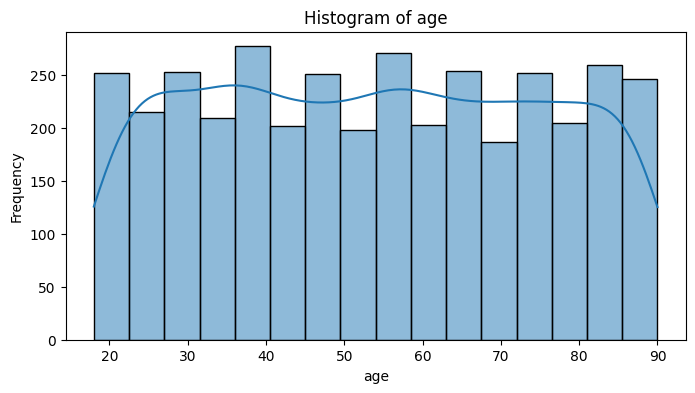

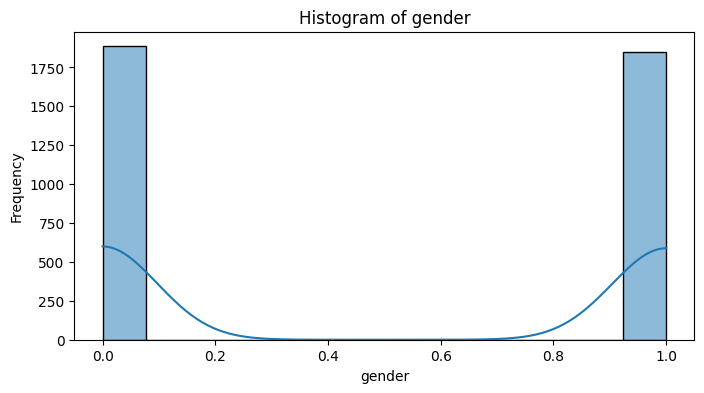

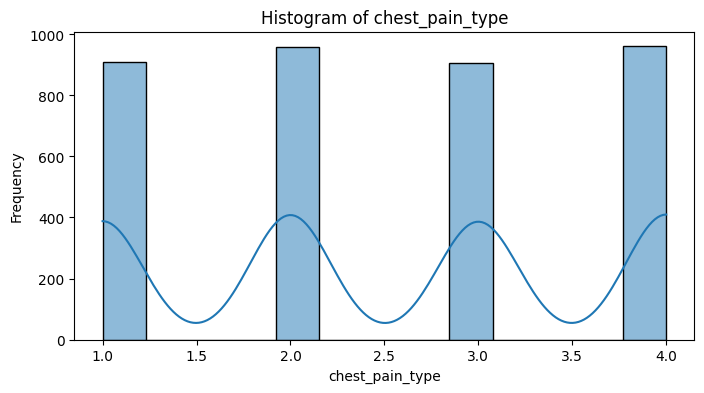

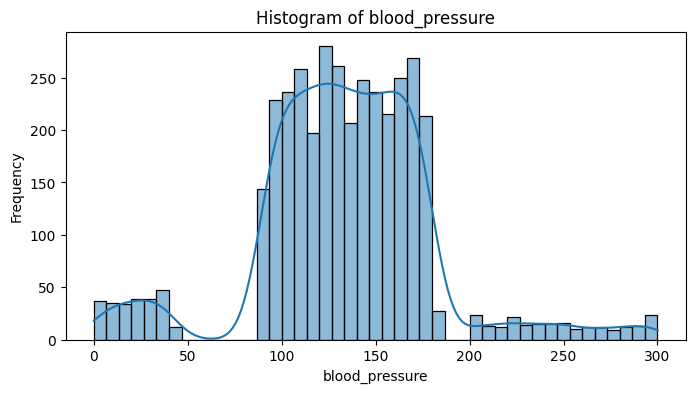

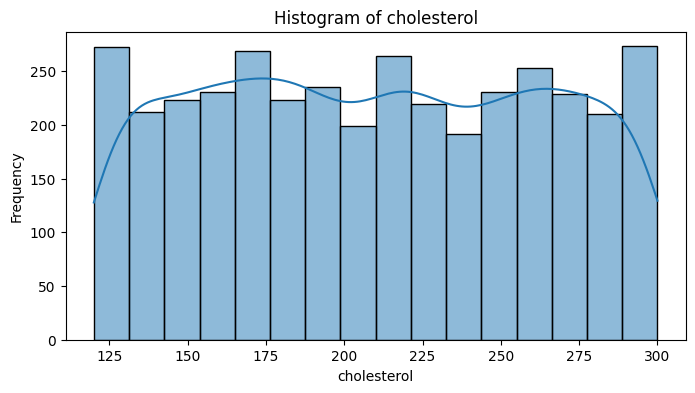

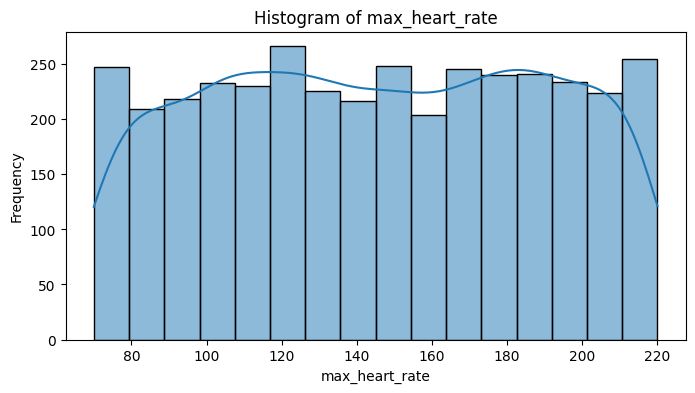

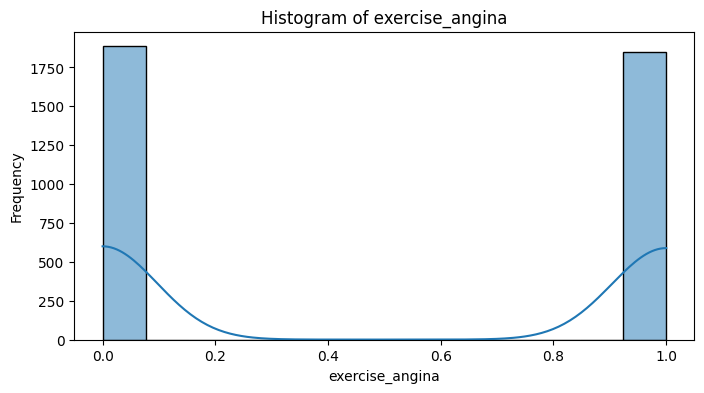

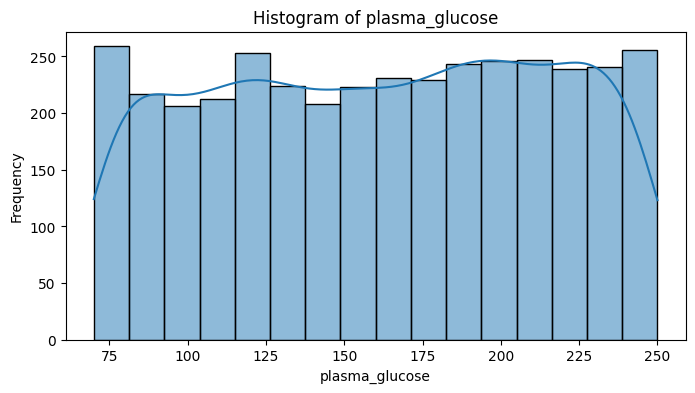

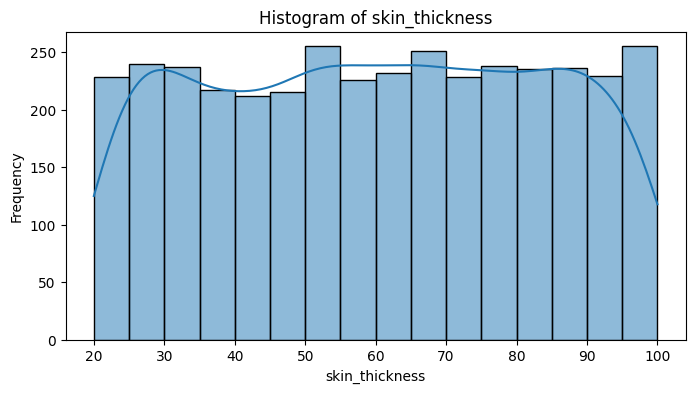

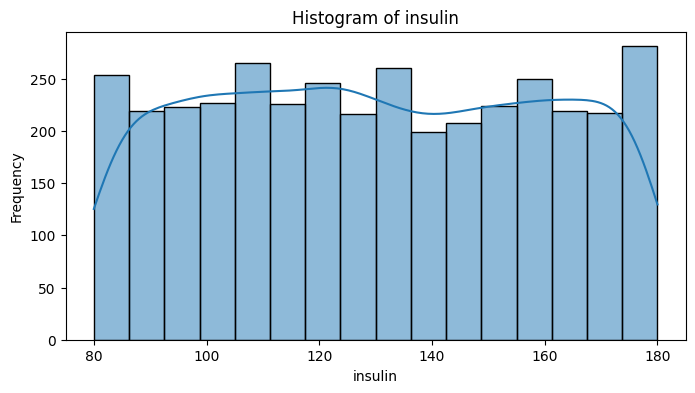

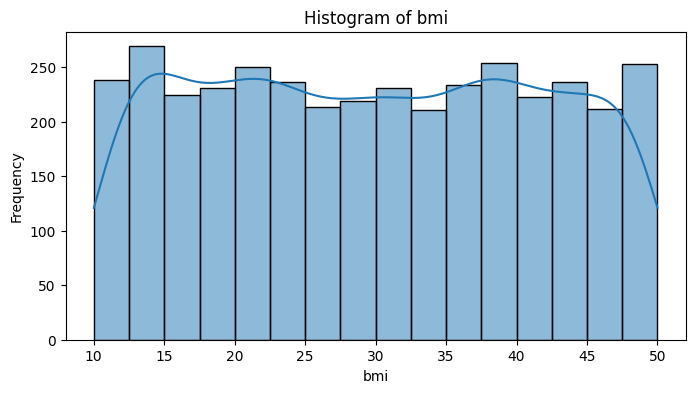

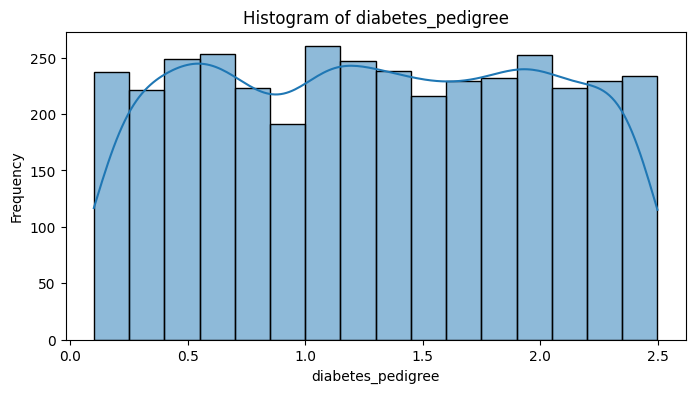

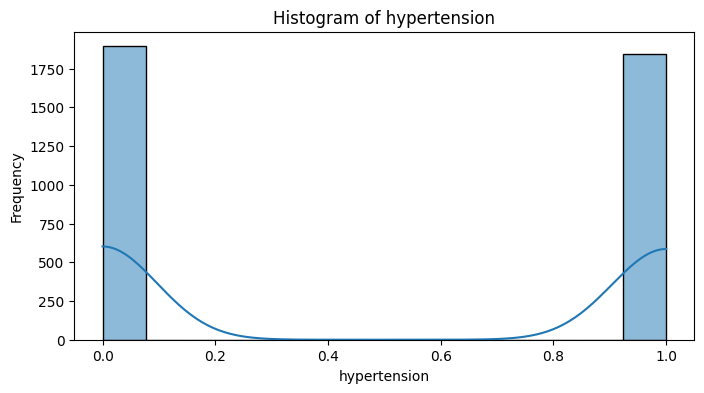

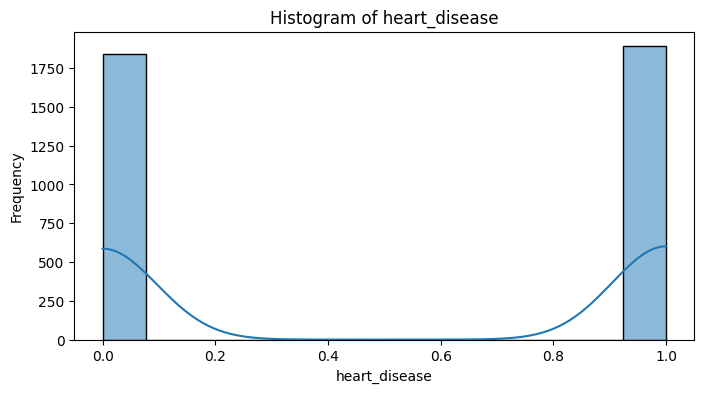

In [ ]:
# Select numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Plot histograms for each numerical column
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

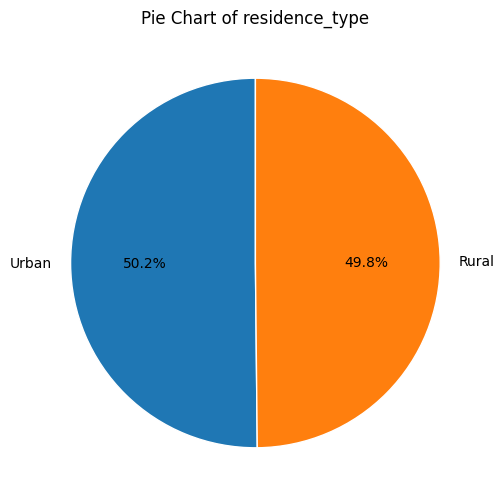

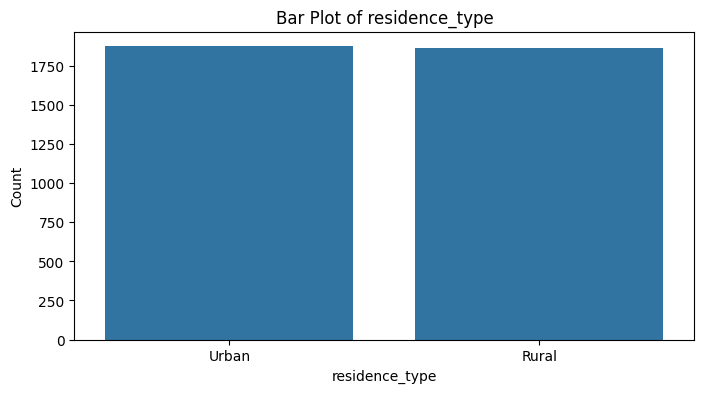

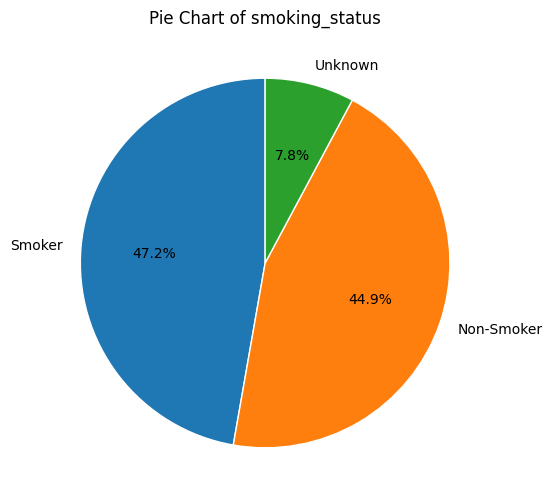

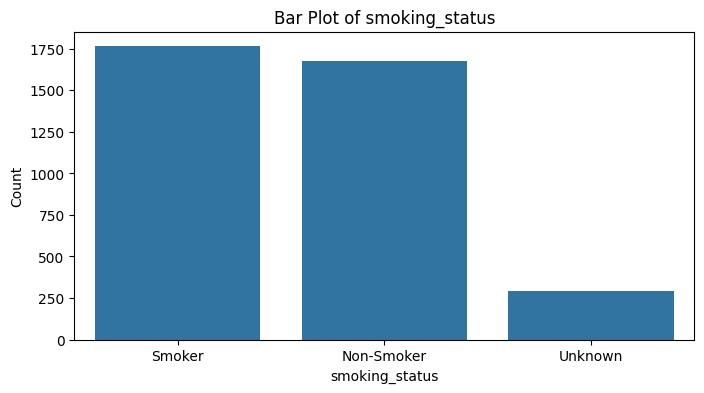

In [ ]:
# Select categorical columns (one-hot encoded columns)
categorical_cols = ['residence_type', 'smoking_status']

# Plot pie charts and bar plots for each categorical column
for col in categorical_cols:
    # Pie chart
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=df[col].value_counts().index, wedgeprops={'edgecolor': 'white'})
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('') # Remove default 'None' label
    plt.show()

    # Bar plot
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [ ]:
px.pie(data_frame=df[df["heart_disease"] == 1 ]["chest_pain_type"].value_counts().to_frame().reset_index() ,
       values="count" ,
       names="chest_pain_type" , # Corrected column name for names
       title="Chest Pain Type Distribution for Patients with Heart Disease"
       )

In [ ]:
# Show the relationship between age and heart disease interactively
fig = px.histogram(df, x='age', color='heart_disease', title='Distribution of Age by Heart Disease Status (Interactive)')
fig.show()

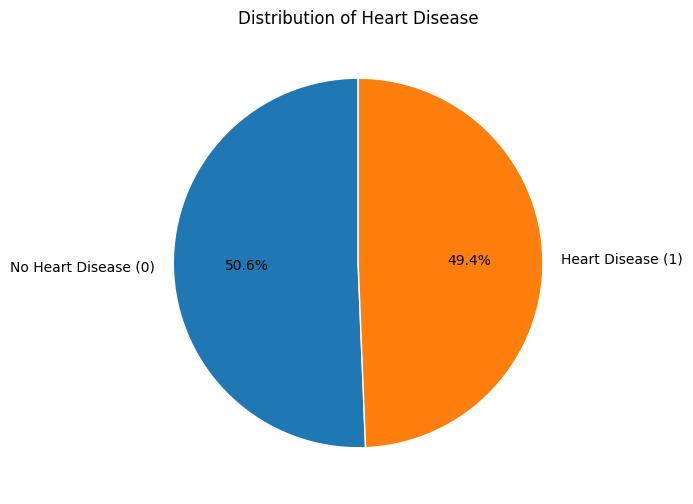

In [ ]:
# Show the distribution of heart disease
plt.figure(figsize=(6, 6))
df['heart_disease'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No Heart Disease (0)', 'Heart Disease (1)'], wedgeprops={'edgecolor': 'white'})
plt.title('Distribution of Heart Disease')
plt.ylabel('') # Remove default 'None' label
plt.show()

In [ ]:
# Show the relationship between max_heart_rate and heart disease interactively
fig = px.box(df, y='max_heart_rate', color='heart_disease', title='Box Plot of Max Heart Rate by Heart Disease Status (Interactive)')
fig.show()

In [ ]:
display(df["smoking_status"].unique())

array(['Smoker', 'Non-Smoker', 'Unknown'], dtype=object)

In [ ]:
def smoking_status_cleanar (status):
    if status == "Smoker" :
        return "Smoker"
    elif status == "Non-Smoker":
        return "Non-Smoker"
    else:
        return np.nan

df["smoking_status"] = df["smoking_status"].apply(smoking_status_cleanar)

In [ ]:
df.isna().sum()

,0
age,0
gender,0
chest_pain_type,0
blood_pressure,0
cholesterol,0
max_heart_rate,0
exercise_angina,0
plasma_glucose,0
skin_thickness,0
insulin,0


In [ ]:
# Remove rows with missing values
df.dropna(inplace=True)

# Display updated info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3442 entries, 0 to 5998
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3442 non-null   int64  
 1   gender             3442 non-null   float64
 2   chest_pain_type    3442 non-null   int64  
 3   blood_pressure     3442 non-null   int64  
 4   cholesterol        3442 non-null   int64  
 5   max_heart_rate     3442 non-null   int64  
 6   exercise_angina    3442 non-null   int64  
 7   plasma_glucose     3442 non-null   float64
 8   skin_thickness     3442 non-null   float64
 9   insulin            3442 non-null   float64
 10  bmi                3442 non-null   float64
 11  diabetes_pedigree  3442 non-null   float64
 12  hypertension       3442 non-null   int64  
 13  heart_disease      3442 non-null   int64  
 14  residence_type     3442 non-null   object 
 15  smoking_status     3442 non-null   object 
dtypes: float64(6), int64(8), obje

None

In [ ]:
# Perform one-hot encoding for 'residence_type' and 'smoking_status'
# Check if the columns exist before encoding to avoid errors if already encoded
if 'residence_type' in df.columns and 'smoking_status' in df.columns:
    df = pd.get_dummies(df, columns=['residence_type', 'smoking_status'], drop_first=True)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert scaled data back to a DataFrame to easily drop NaNs
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Drop rows with any NaN values after scaling
df_scaled.dropna(inplace=True)


# Display the first few rows of the scaled data (as a numpy array)
display(df_scaled.head())

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type_Urban,smoking_status_Smoker
0,-1.409939,1.004659,1.329420,2.419673,-1.337861,1.526769,-0.983289,-1.012274,-1.170824,-0.717561,0.694890,-1.173737,1.012866,0.990746,0.997678,0.975319
1,-0.362955,-0.995362,0.435347,2.859062,-0.467616,1.089236,-0.983289,-0.231868,-0.739520,-0.956603,0.685701,1.689630,1.012866,-1.009341,-1.002327,-1.025306
2,-0.220184,1.004659,0.435347,-0.907130,-0.883820,1.066208,-0.983289,0.015578,-1.257084,1.365515,-1.466567,-1.091302,1.012866,0.990746,-1.002327,0.975319
3,0.446079,1.004659,0.435347,-2.434530,-1.054085,-0.891176,-0.983289,-1.107445,0.295610,-0.956603,-0.643674,-0.336972,-0.987297,-1.009341,-1.002327,-1.025306
4,-0.791266,1.004659,1.329420,2.691676,-0.164923,1.273460,-0.983289,0.472401,-1.688388,1.707003,0.494784,-1.646704,-0.987297,-1.009341,0.997678,0.975319


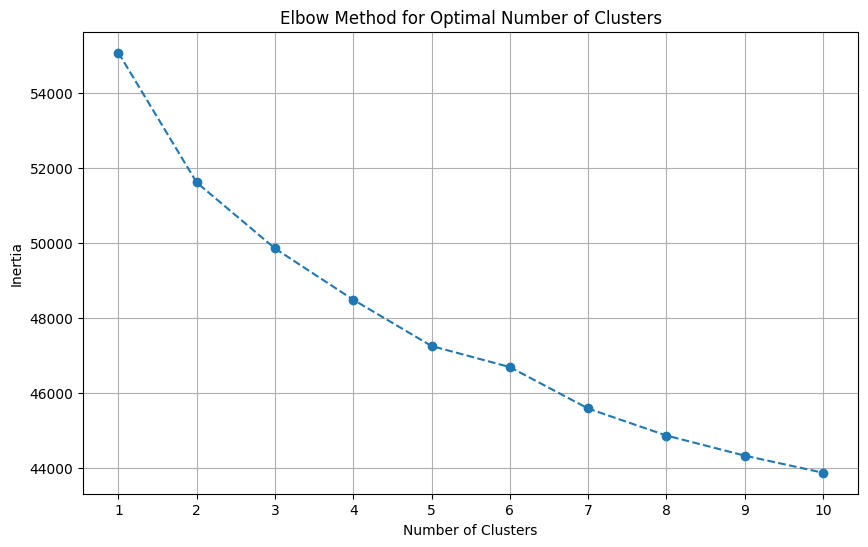

In [ ]:
# Use the Elbow Method to find the optimal number of clusters
inertia = []
range_of_clusters = range(1, 11) # You can adjust the range as needed

for num_clusters in range_of_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(df_scaled) # Use the scaled data
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range_of_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_of_clusters)
plt.grid(True)
plt.show()

In [ ]:
# Apply K-Means clustering
# Choose the number of clusters based on the Elbow Method plot
num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(df_scaled)

# Add the cluster labels to the dataframe that was used for clustering (df_scaled)
df_scaled_clustered = df_scaled.copy()
df_scaled_clustered['cluster'] = kmeans.labels_

# Display the number of patients in each cluster in the scaled dataframe
display(df_scaled_clustered['cluster'].value_counts())

,count
cluster,
1,1743
0,1699


In [ ]:
# Calculate the silhouette score
# Use the scaled data and the cluster labels from the KMeans model
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)

# Display the silhouette score
display(f"The silhouette score is: {silhouette_avg}")

'The silhouette score is: 0.06356175561426626'

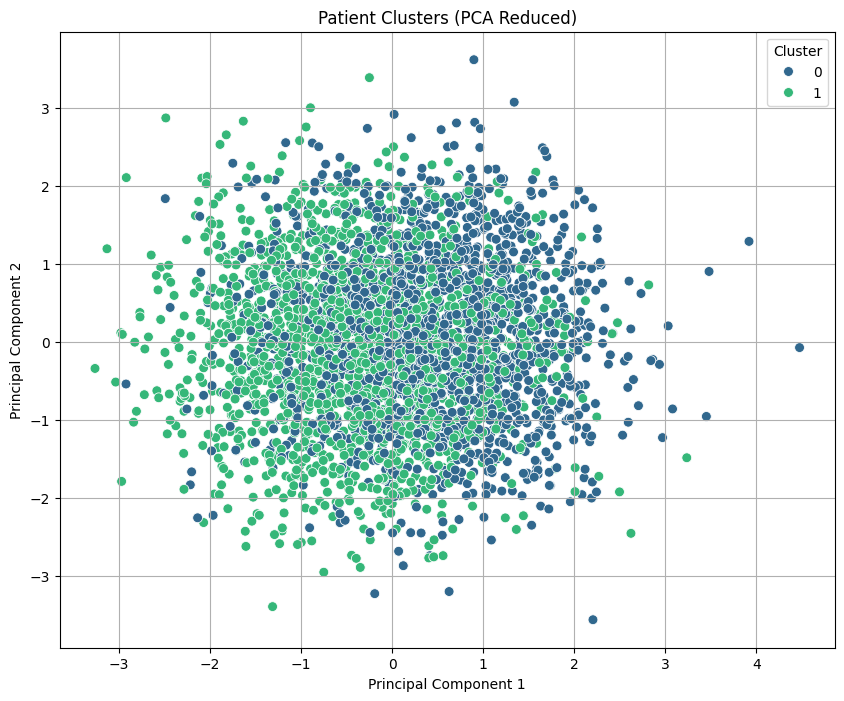

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled) # Use the scaled data for PCA

# Add the PCA components to the clustered dataframe
df_scaled_clustered['PCA1'] = df_pca[:, 0]
df_scaled_clustered['PCA2'] = df_pca[:, 1]

# Plot the clusters using the PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_scaled_clustered, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=50)
plt.title('Patient Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

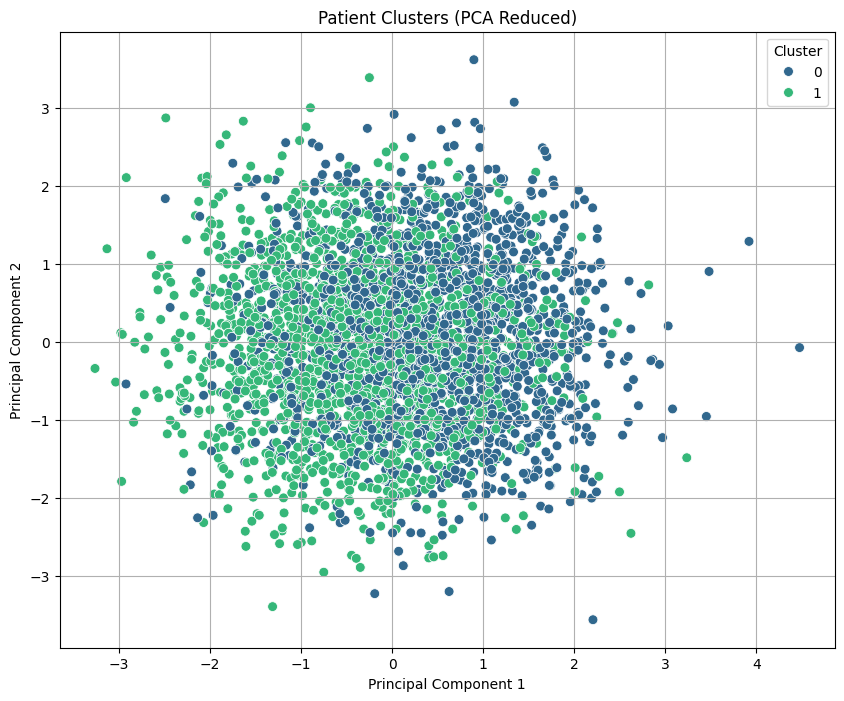

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled) # Use the scaled data for PCA

# Add the PCA components to the clustered dataframe
df_scaled_clustered = df_scaled.copy() # Create a copy to avoid modifying df_scaled in place
df_scaled_clustered['PCA1'] = df_pca[:, 0]
df_scaled_clustered['PCA2'] = df_pca[:, 1]

# Add the cluster labels to the dataframe that was used for clustering (df_scaled_clustered)
df_scaled_clustered['cluster'] = kmeans.labels_


# Plot the clusters using the PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_scaled_clustered, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=50)
plt.title('Patient Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert scaled data back to a DataFrame to easily drop NaNs
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Drop rows with any NaN values after scaling
df_scaled.dropna(inplace=True)

# Task
Analyze the characteristics of the clusters and summarize the findings.

In [ ]:
# Group by cluster and calculate the mean of each feature
cluster_means = df_scaled_clustered.groupby('cluster').mean()

# Display the mean values per cluster
display(cluster_means)

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type_Urban,smoking_status_Smoker,PCA1,PCA2
cluster,,,,,,,,,,,,,,,,,,
0,-0.020972,0.008769,-0.033528,0.012768,-0.000715,0.032331,0.023328,0.002481,-0.027652,-0.020033,-0.012856,-0.016612,1.012866,0.014836,0.017099,0.005034,0.408078,0.103799
1,0.020443,-0.008547,0.032681,-0.012446,0.000697,-0.031515,-0.022739,-0.002419,0.026954,0.019528,0.012531,0.016192,-0.987297,-0.014461,-0.016667,-0.004907,-0.397776,-0.101178


## Summary

In [ ]:
print("Summary of Cluster Characteristics:")
print("-" * 30)

for i in range(num_clusters):
    print(f"Cluster {i}:")
    # Identify features with the largest absolute difference in means
    diff = cluster_means.loc[i] - cluster_means.loc[1-i]
    most_different_features = diff.abs().sort_values(ascending=False)

    print("Key characteristics (features with most significant difference from the other cluster):")
    # Display the top features that differentiate this cluster
    for feature in most_different_features.head(5).index: # Display top 5 most different features
        mean_value = cluster_means.loc[i, feature]
        print(f"  - {feature}: {mean_value:.2f} (Mean in the other cluster: {cluster_means.loc[1-i, feature]:.2f})")
    print("-" * 30)

# Include the silhouette score in the summary
print(f"Silhouette Score: {silhouette_avg:.4f}")
print("A silhouette score of 0.06 suggests that the clusters are not well-separated.")

Summary of Cluster Characteristics:
------------------------------
Cluster 0:
Key characteristics (features with most significant difference from the other cluster):
  - hypertension: 1.01 (Mean in the other cluster: -0.99)
  - PCA1: 0.41 (Mean in the other cluster: -0.40)
  - PCA2: 0.10 (Mean in the other cluster: -0.10)
  - chest_pain_type: -0.03 (Mean in the other cluster: 0.03)
  - max_heart_rate: 0.03 (Mean in the other cluster: -0.03)
------------------------------
Cluster 1:
Key characteristics (features with most significant difference from the other cluster):
  - hypertension: -0.99 (Mean in the other cluster: 1.01)
  - PCA1: -0.40 (Mean in the other cluster: 0.41)
  - PCA2: -0.10 (Mean in the other cluster: 0.10)
  - chest_pain_type: 0.03 (Mean in the other cluster: -0.03)
  - max_heart_rate: -0.03 (Mean in the other cluster: 0.03)
------------------------------
Silhouette Score: 0.0636
A silhouette score of 0.06 suggests that the clusters are not well-separated.


## Summary:

### Data Analysis Key Findings

*   The most significant differentiating feature between Cluster 0 and Cluster 1 was `hypertension`. Cluster 0 had a mean `hypertension` value of 1.01, while Cluster 1 had a mean of -0.99.
*   Other features showing differences between clusters included `PCA1`, `PCA2`, `chest_pain_type`, and `max_heart_rate`.
*   The silhouette score for the clustering was 0.0636.

### Insights or Next Steps

*   Given the low silhouette score (0.0636), the two clusters are not well-separated, suggesting that a 2-cluster solution may not be the optimal or most meaningful representation of the data.
*   Further investigation with a different number of clusters or alternative clustering algorithms could be beneficial to identify more distinct and well-separated groups within the data.
